# AIRLINE PASSENGER SATISFACTION

**Importing necessary libraries**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA

# About the Dataset

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Reading CSV File and Combine Data.

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
data = pd.read_csv(r'/content/drive/MyDrive/Dataset/test.csv')
df = pd.read_csv(r'/content/drive/MyDrive/Dataset/train.csv')

In [97]:
combined_df = pd.concat([data, df])

In [98]:
combined_df.to_csv('/content/drive/MyDrive/Dataset/combined_data.csv', index=False)

I saved the combined DataFrame to a new CSV file so as to make the access easy.

In [99]:
print(combined_df)

        Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0                0  19556  Female     Loyal Customer   52  Business travel   
1                1  90035  Female     Loyal Customer   36  Business travel   
2                2  12360    Male  disloyal Customer   20  Business travel   
3                3  77959    Male     Loyal Customer   44  Business travel   
4                4  36875  Female     Loyal Customer   49  Business travel   
...            ...    ...     ...                ...  ...              ...   
103899      103899  94171  Female  disloyal Customer   23  Business travel   
103900      103900  73097    Male     Loyal Customer   49  Business travel   
103901      103901  68825    Male  disloyal Customer   30  Business travel   
103902      103902  54173  Female  disloyal Customer   22  Business travel   
103903      103903  62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0  

# Understanding the Data

In [100]:
combined_df.shape

(129880, 25)

In [101]:
combined_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [102]:
combined_df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [103]:
combined_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [104]:
combined_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [105]:
combined_df.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [106]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

# Feature Drop

 I dropped the *id* and *Unnamed: 0* columns from a dataset which won't be used to meet the goals for selecting this dataset.

In [107]:
combined_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [108]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [109]:
print(combined_df.head())

   Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                

In [110]:
combined_df.columns.to_list()

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

**Categorical Variable Handling**

In [111]:
exclude_ = ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age']
categorical_columns = [x for x in combined_df.columns.to_list() if x not in exclude_]

for i in categorical_columns:
    combined_df[i] = combined_df[i].astype('category')

This converts all columns to categorical data type except 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance' and 'Age'.

In [112]:
combined_df.describe(include='category')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73452


In [113]:
for col in combined_df.columns:
    print(f'{col}: {combined_df[col].nunique()}  {combined_df[col].unique()}')

Gender: 2  ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Customer Type: 2  ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
Age: 75  [52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]
Type of Travel: 2  ['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']
Class: 3  ['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']
Flight Distance: 3821  [ 160 2863  192 ...  974 1479  400]
Inflight wifi service: 6  [5, 1, 2, 0, 3, 4]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
Departure/Arrival time convenient: 6  [4, 1, 0, 3, 5, 2]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
Ease of Online booking: 6  [3, 2, 0, 4, 5, 1]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
Gate location:

In [114]:
len(categorical_columns)

19

# Data Cleaning

**Duplication Detection**

In [115]:
combined_df.duplicated().value_counts()

False    129880
dtype: int64

There are no duplicate rows in this dataframe.

In [116]:
combined_df.shape

(129880, 23)

**Null Value Detection**

In [117]:
combined_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [118]:
combined_df = combined_df.dropna()

In [119]:
combined_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [120]:
combined_df.shape

(129487, 23)

# Outlier Detection

In [121]:
z_scores = np.abs(stats.zscore(combined_df.select_dtypes(include=np.number)))
threshold = 3
outliers_z = np.where(z_scores > threshold)
print("Number of outliers detected using Z-score method:", len(outliers_z[0]))

Number of outliers detected using Z-score method: 5561


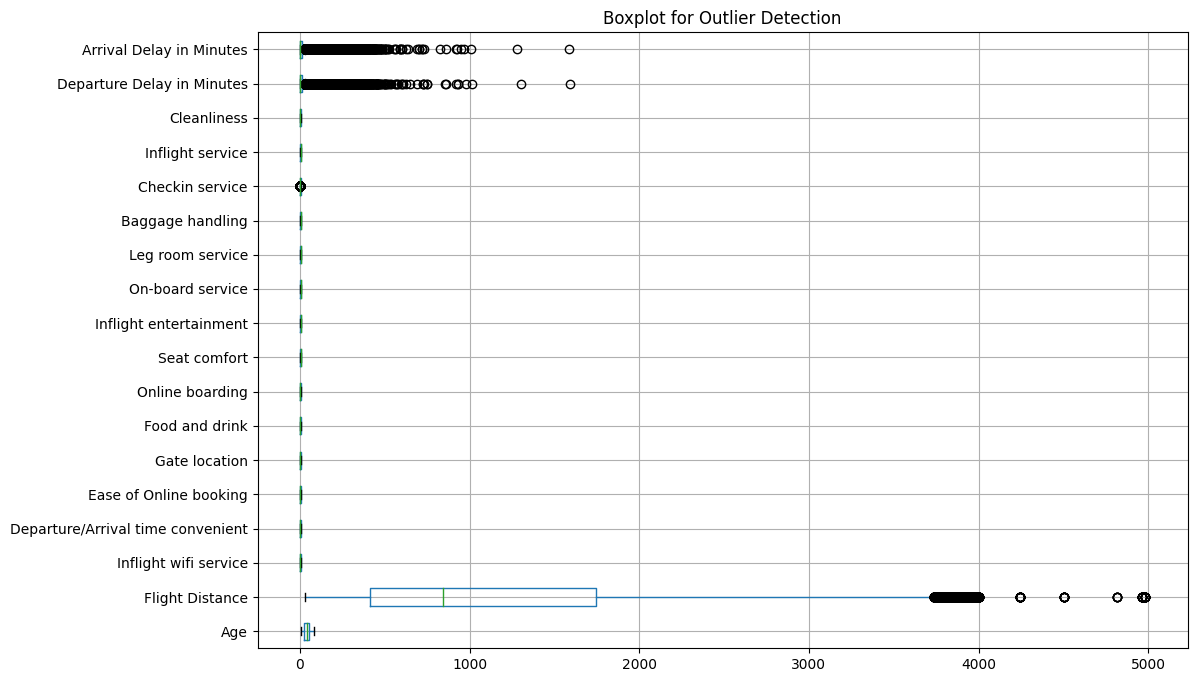

In [122]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
df[numeric_features].boxplot(vert=False)
plt.title('Boxplot for Outlier Detection')
plt.show()

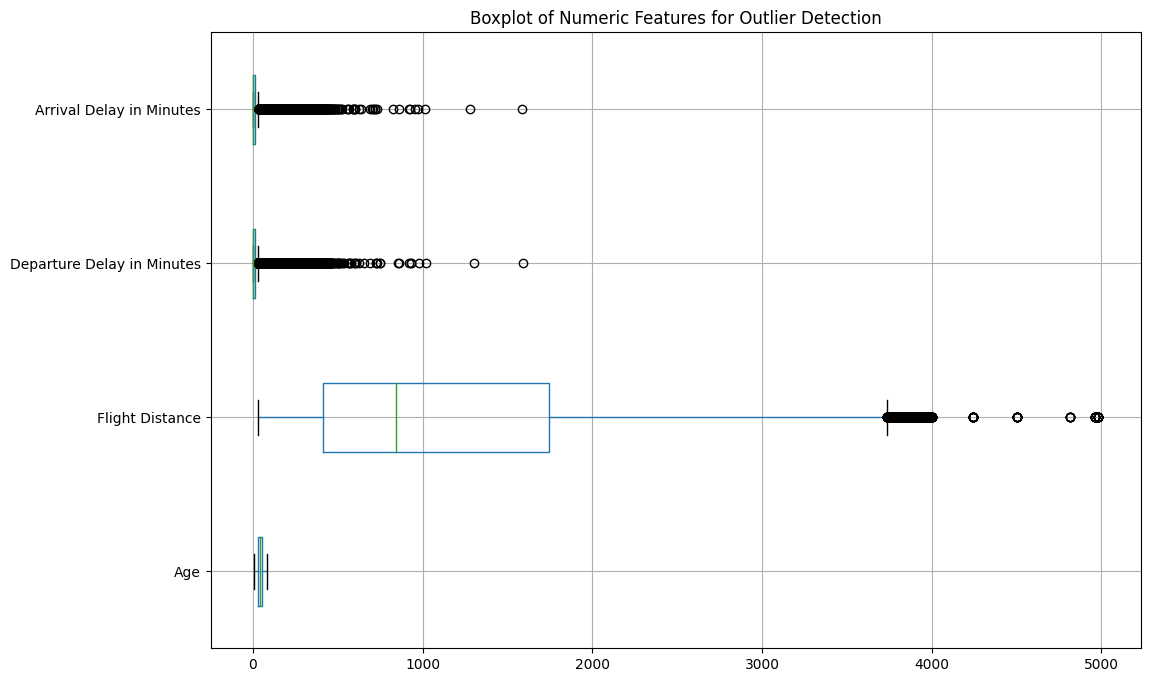

In [123]:
numeric_features = combined_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
df[numeric_features].boxplot(vert=False)
plt.title('Boxplot of Numeric Features for Outlier Detection')
plt.show()

# Correlation

Correlation Matrix:
                                        Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
On-board service                   0.057594         0.109526   
Leg room service                   0.040583         0.133916   
Baggage handling                  -0.047529         0.063184   
Checkin service                    0.035482         0.073072   
Inflight service    

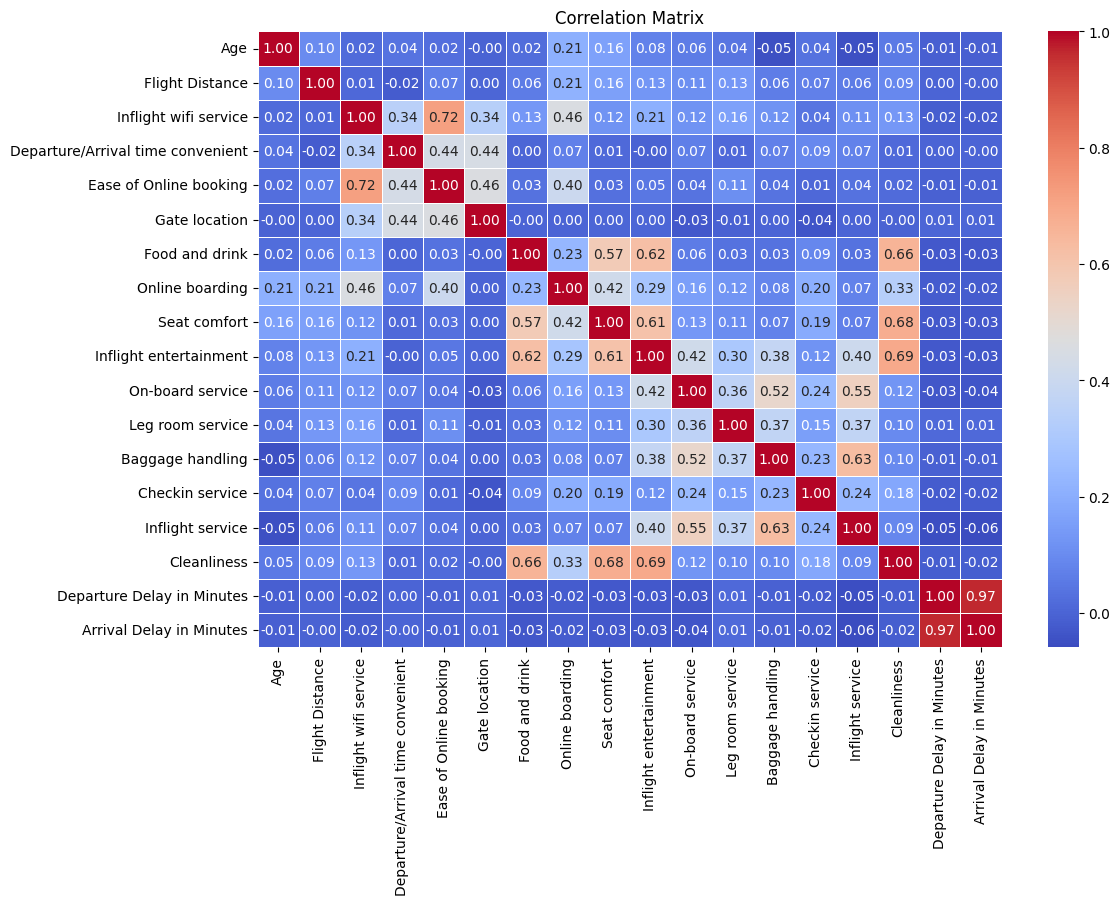

In [124]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Correlation of Numerical Columns**

Correlation Matrix:
                                 Age  Flight Distance  \
Age                         1.000000         0.099863   
Flight Distance             0.099863         1.000000   
Departure Delay in Minutes -0.009263         0.001992   
Arrival Delay in Minutes   -0.011248        -0.001935   

                            Departure Delay in Minutes  \
Age                                          -0.009263   
Flight Distance                               0.001992   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.965291   

                            Arrival Delay in Minutes  
Age                                        -0.011248  
Flight Distance                            -0.001935  
Departure Delay in Minutes                  0.965291  
Arrival Delay in Minutes                    1.000000  


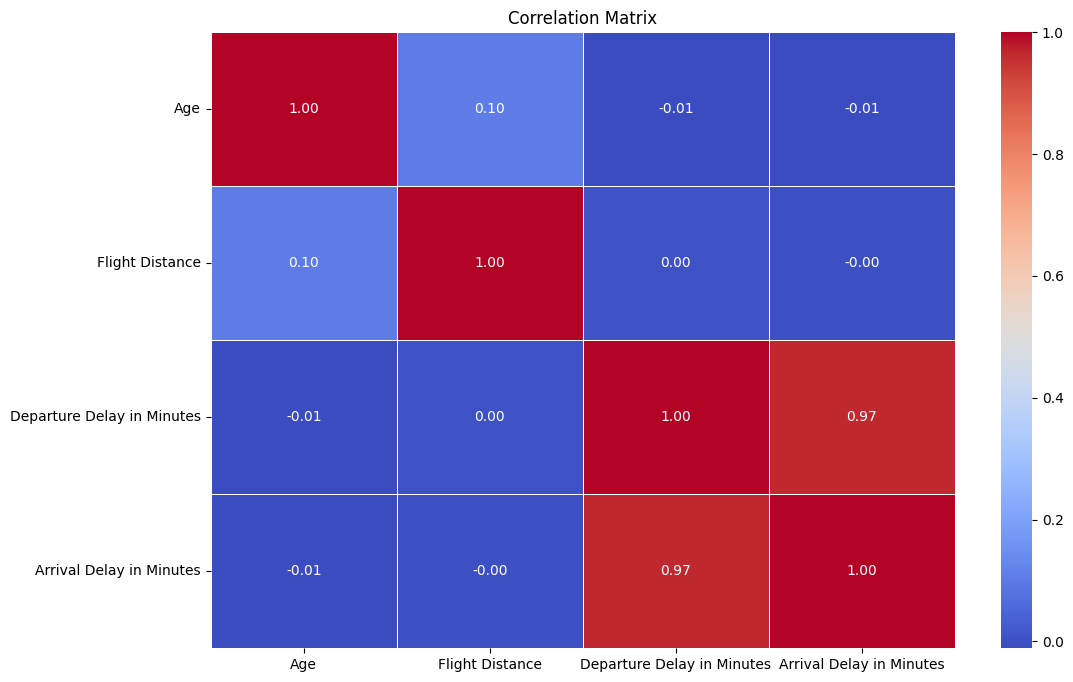

In [125]:
correlation_matrix = combined_df.select_dtypes(include=['float64', 'int64']).corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This correlation shows that the Arrival Delay and Departure Delay are **positively correlated** with each other.

# Visualization

**Regression Plot between Departure Delay vs Arrival Delay**

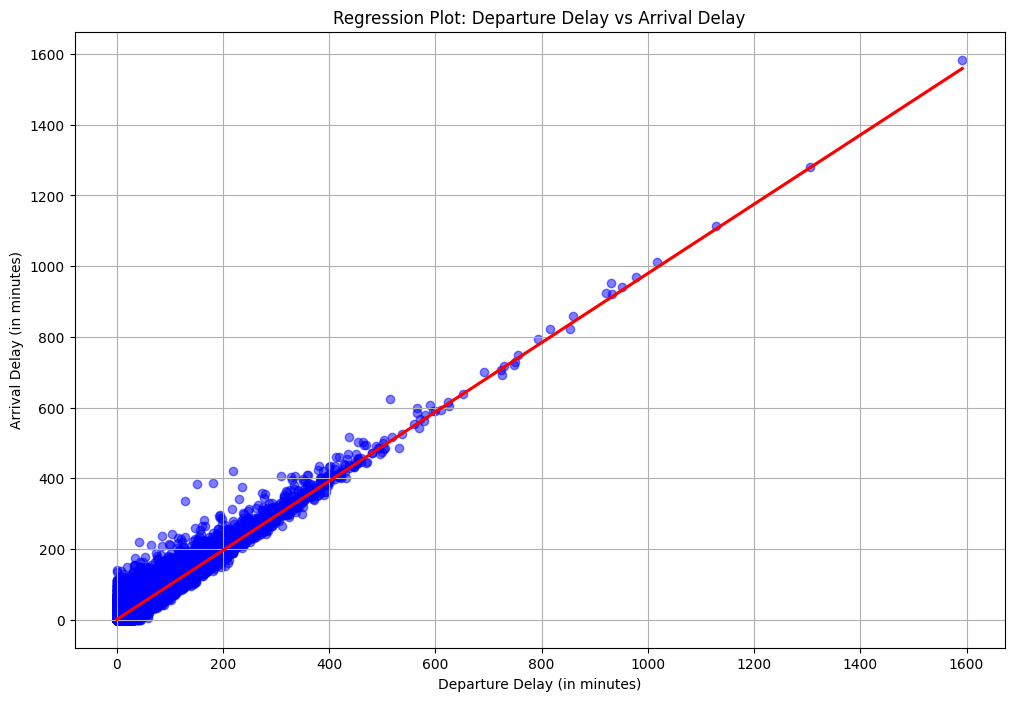

In [126]:
plt.figure(figsize=(12, 8))

sns.regplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=combined_df,
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Regression Plot: Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (in minutes)')
plt.ylabel('Arrival Delay (in minutes)')
plt.grid(True)
plt.show()

**Scatter Plot between Departure Delay and Arrival Delay on the basis of Satisfaction**

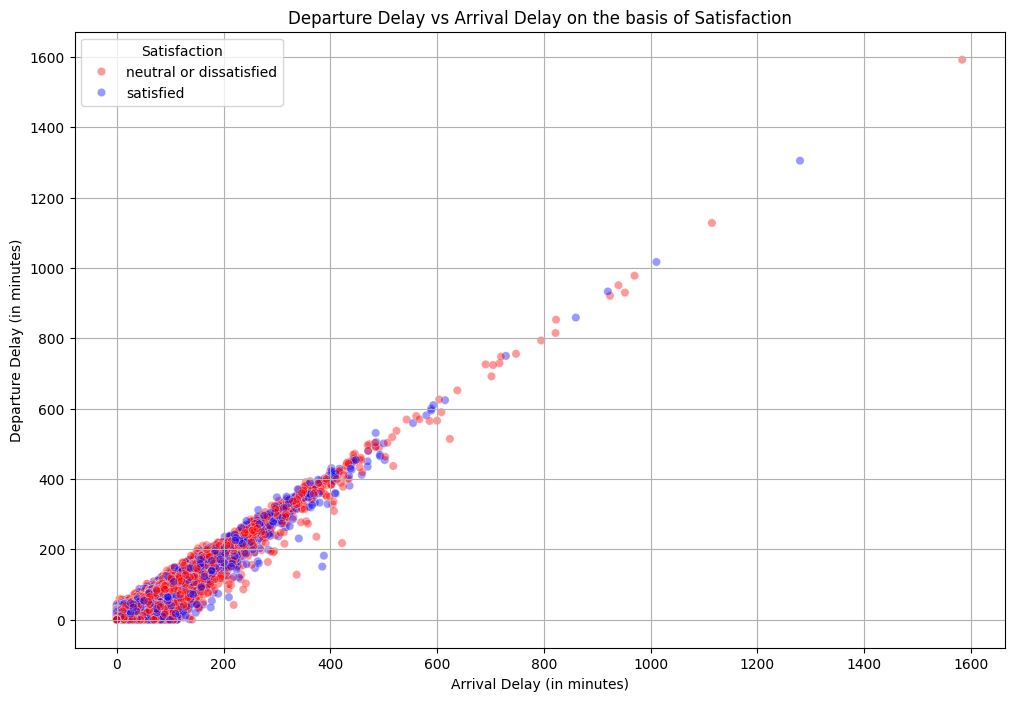

In [127]:
plt.figure(figsize=(12, 8))  # Create a new figure

custom_palette = {'satisfied': 'blue', 'neutral or dissatisfied': 'red'}

sns.scatterplot(data=combined_df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', palette=custom_palette, alpha=0.4)

plt.title('Departure Delay vs Arrival Delay on the basis of Satisfaction')
plt.xlabel('Arrival Delay (in minutes)')
plt.ylabel('Departure Delay (in minutes)')
plt.legend(title='Satisfaction')
plt.grid(True)
plt.show()

**Scatter Plot between Departure Delay vs Arrival Delay on the basis of Customer Type**

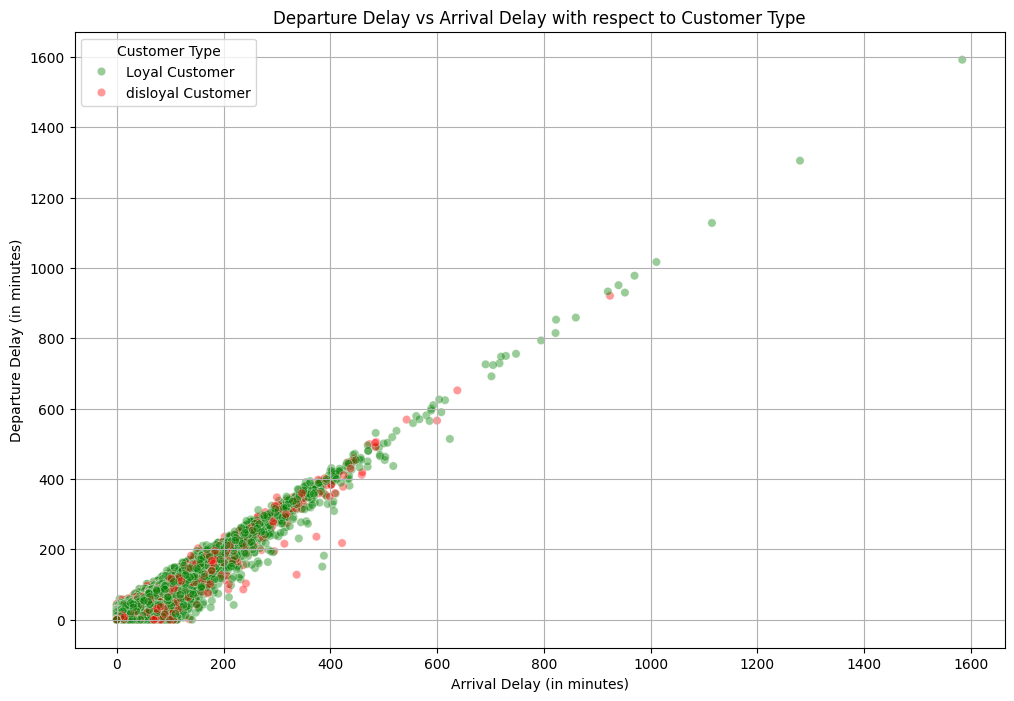

In [128]:
custom_palette = {'Loyal Customer': 'green', 'disloyal Customer': 'red'}

plt.figure(figsize=(12, 8))

sns.scatterplot(data=combined_df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='Customer Type', palette=custom_palette, alpha=0.4)

plt.title('Departure Delay vs Arrival Delay with respect to Customer Type')
plt.xlabel('Arrival Delay (in minutes)')
plt.ylabel('Departure Delay (in minutes)')
plt.legend(title='Customer Type')
plt.grid(True)
plt.show()

From this graph, we are now sure that the most of the customers are loyal about the arrival and departure delay times.

**Descriptive Statistics**

This section code calculates descriptive statistics for numerical columns in combined_df, including mean, standard deviation, minimum, maximum, and quartiles, and appends the mode values for each column to the statistics. This helps in understanding the DataFrame, which can be valuable for data exploration and analysis.

In [129]:
descriptive_stats = combined_df.describe()
mode = combined_df.mode().iloc[0]
descriptive_stats.loc['mode'] = mode
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                 Age  Flight Distance  Departure Delay in Minutes  \
count  129487.000000    129487.000000               129487.000000   
mean       39.428761      1190.210662                   14.643385   
std        15.117597       997.560954                   37.932867   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       844.000000                    0.000000   
75%        51.000000      1744.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   
mode       39.000000       337.000000                    0.000000   

       Arrival Delay in Minutes  
count             129487.000000  
mean                  15.091129  
std                   38.465650  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max          

**Distribution of Satisfaction Level through Pie-Chart**

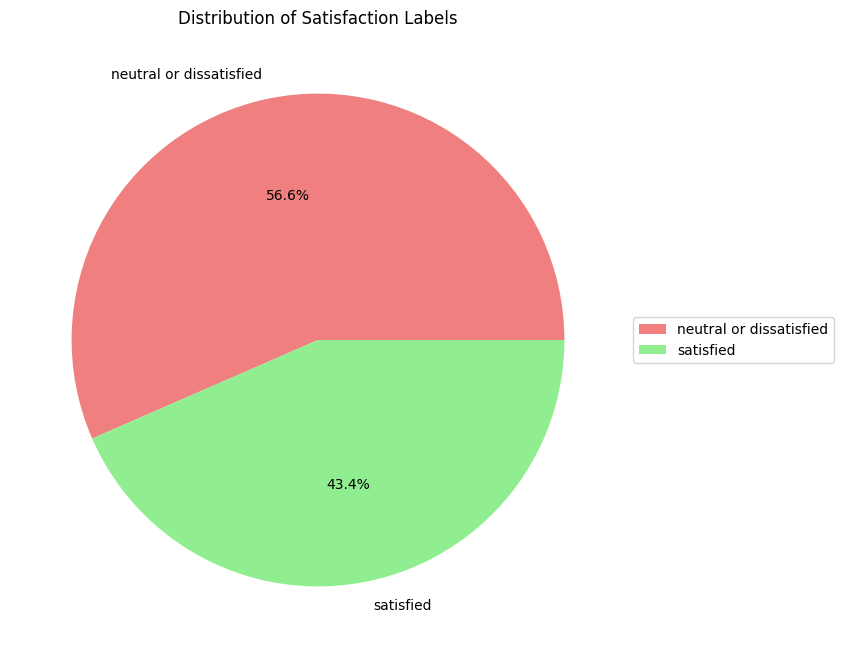

In [130]:
piechart_colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(12, 8))
combined_df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=piechart_colors)

plt.legend(combined_df['satisfaction'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Satisfaction Labels')
plt.ylabel('')
plt.show()

**Subplot of Count of Travel by Type of Gender and Satisfaction**

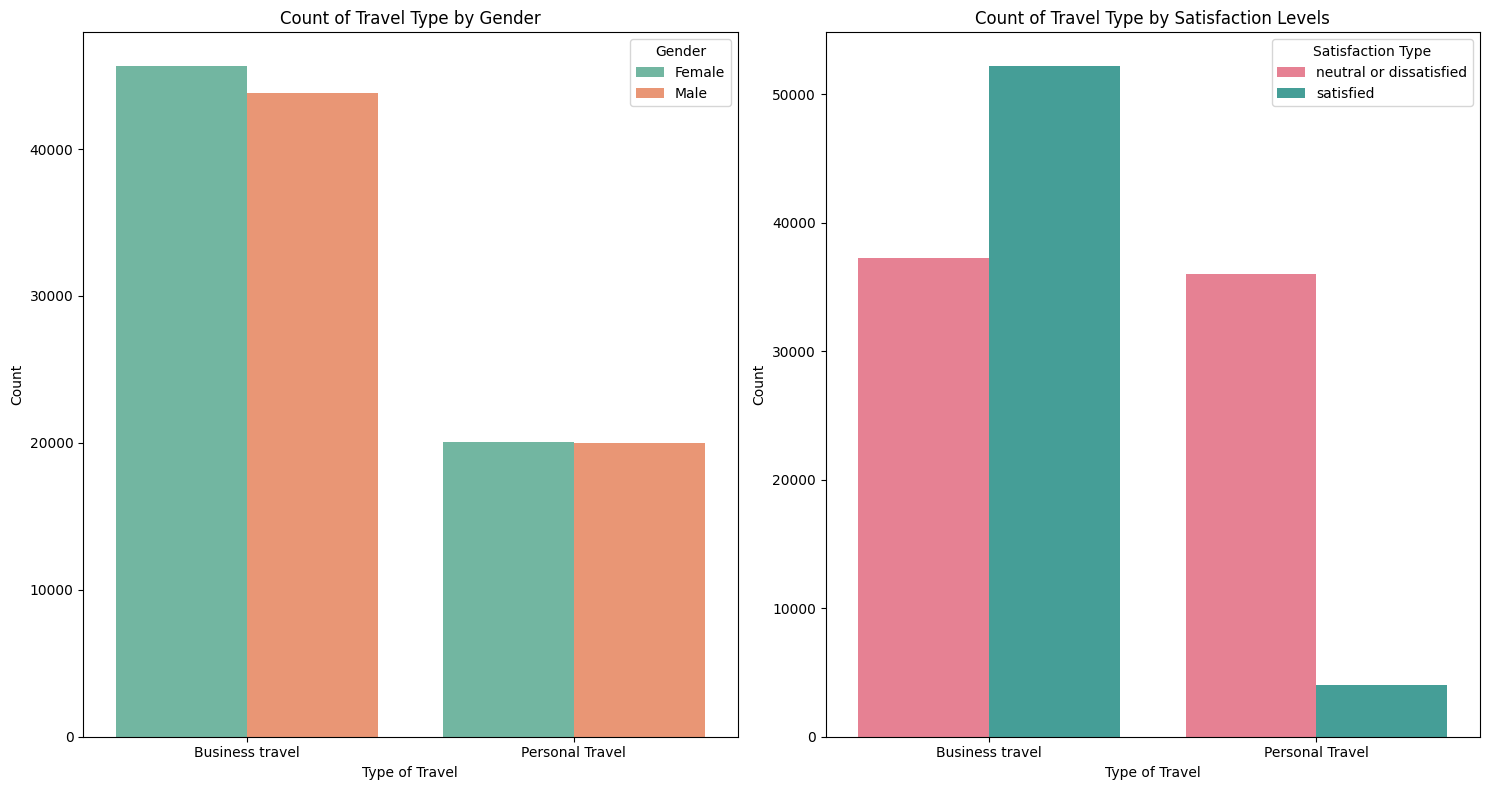

In [131]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=combined_df, x='Type of Travel', hue='Gender', palette='Set2')
plt.title('Count of Travel Type by Gender')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=combined_df, x='Type of Travel', hue='satisfaction', palette='husl')
plt.title('Count of Travel Type by Satisfaction Levels')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction Type')

plt.tight_layout()
plt.show()

**Distribution between Genders in each Class**

<Figure size 1200x800 with 0 Axes>

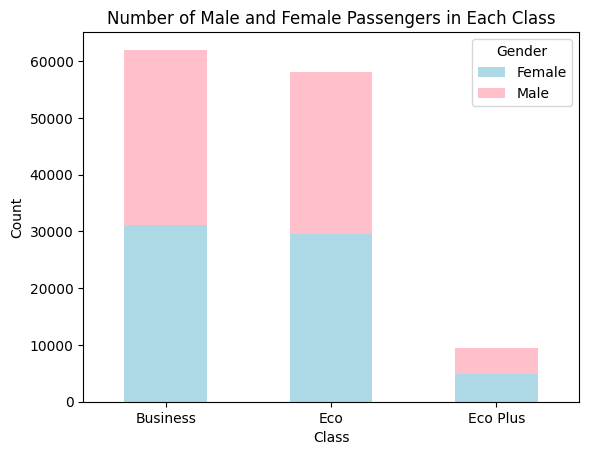

In [132]:
gender_class_counts = combined_df.groupby(['Class', 'Gender']).size().unstack()

plt.figure(figsize=(12, 8))
gender_class_counts.plot(kind='bar', stacked=True, color=["lightblue", "pink"])
plt.title('Number of Male and Female Passengers in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


**Distribution of Data**

In [133]:
numeric_columns = combined_df.select_dtypes(include=['int64', 'float64'])

skewness = numeric_columns.skew()

print("Skewness of the data:")
print(skewness)

Skewness of the data:
Age                          -0.003376
Flight Distance               1.108433
Departure Delay in Minutes    6.853578
Arrival Delay in Minutes      6.670125
dtype: float64


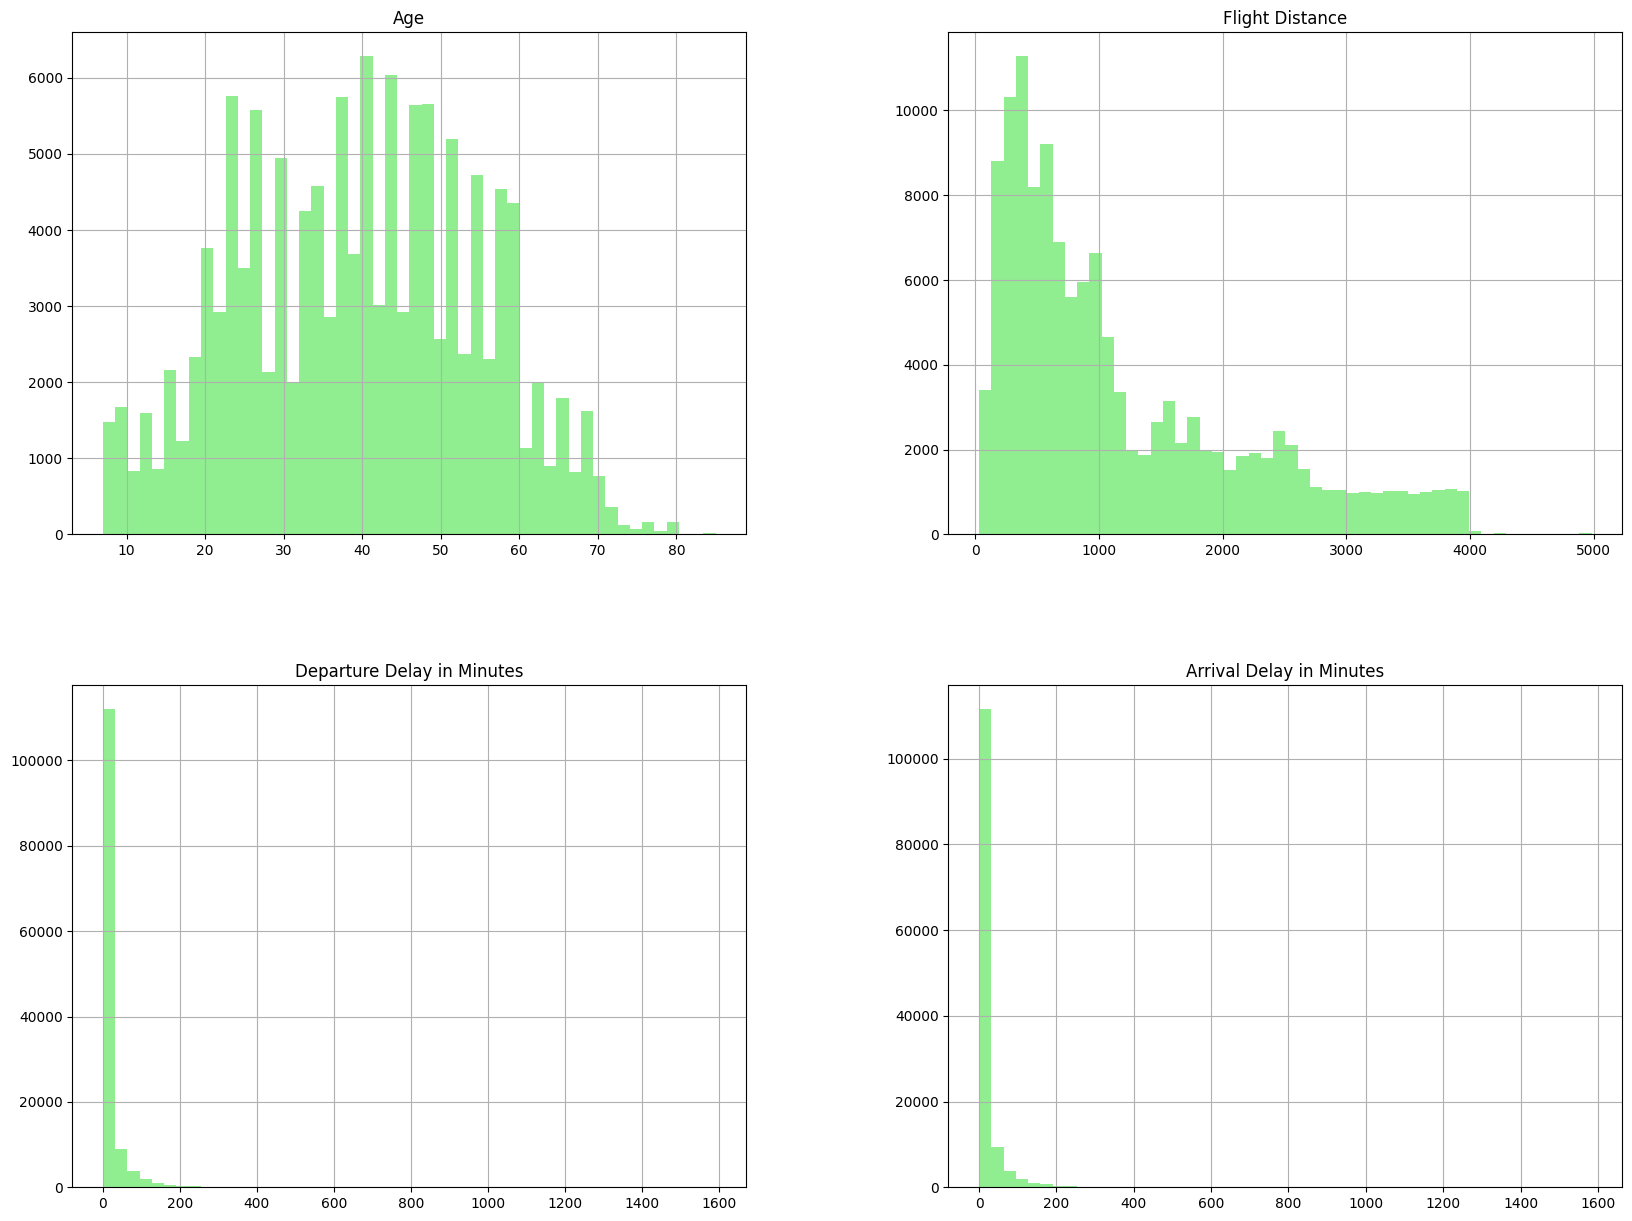

In [134]:
combined_df.hist(bins = 50, figsize=(20,15), color = 'lightgreen')
plt.show()

**Visualization between Loyal and Disloyal Passengers**

<ipython-input-135-2cff13395332>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='deep')


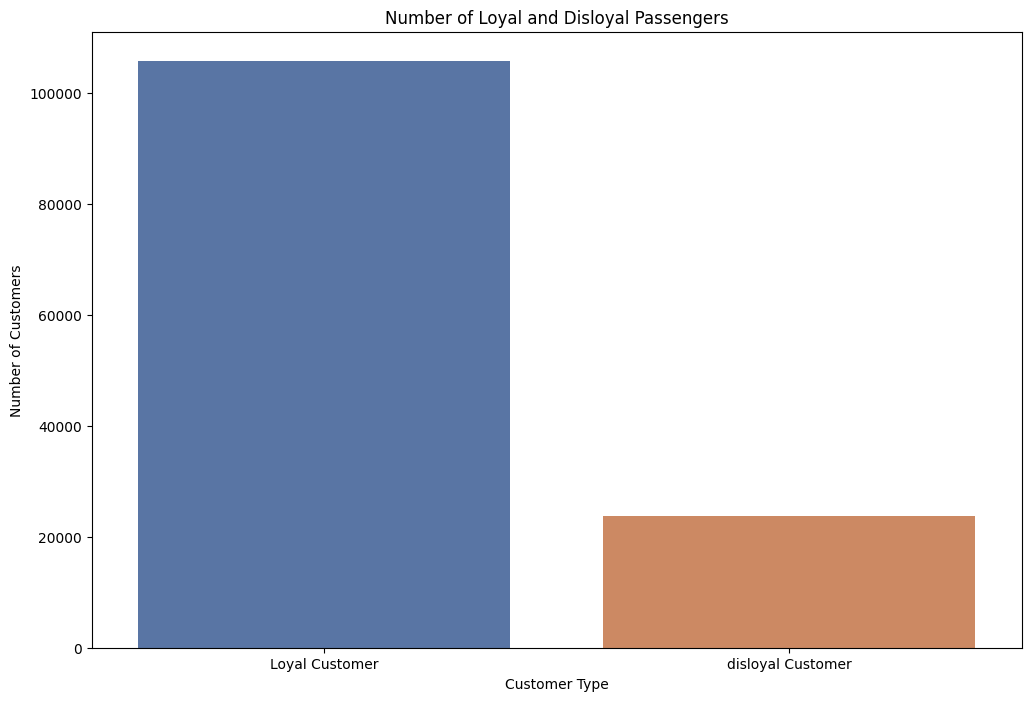

In [135]:
customer_type_counts = combined_df['Customer Type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='deep')
plt.title('Number of Loyal and Disloyal Passengers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')

plt.show()

**Number of Loyal and Disloyal Passengers by Customer Type and Gender**

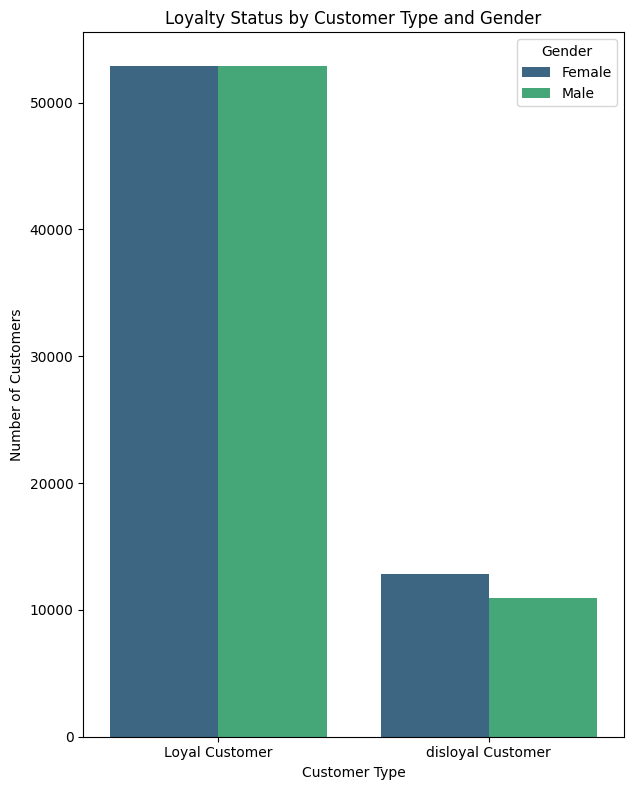

In [136]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 2)
sns.countplot(data=combined_df, x='Customer Type', hue='Gender', palette='viridis')
plt.title('Loyalty Status by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

**Visualization between Customer Satisfaction and other Columns**

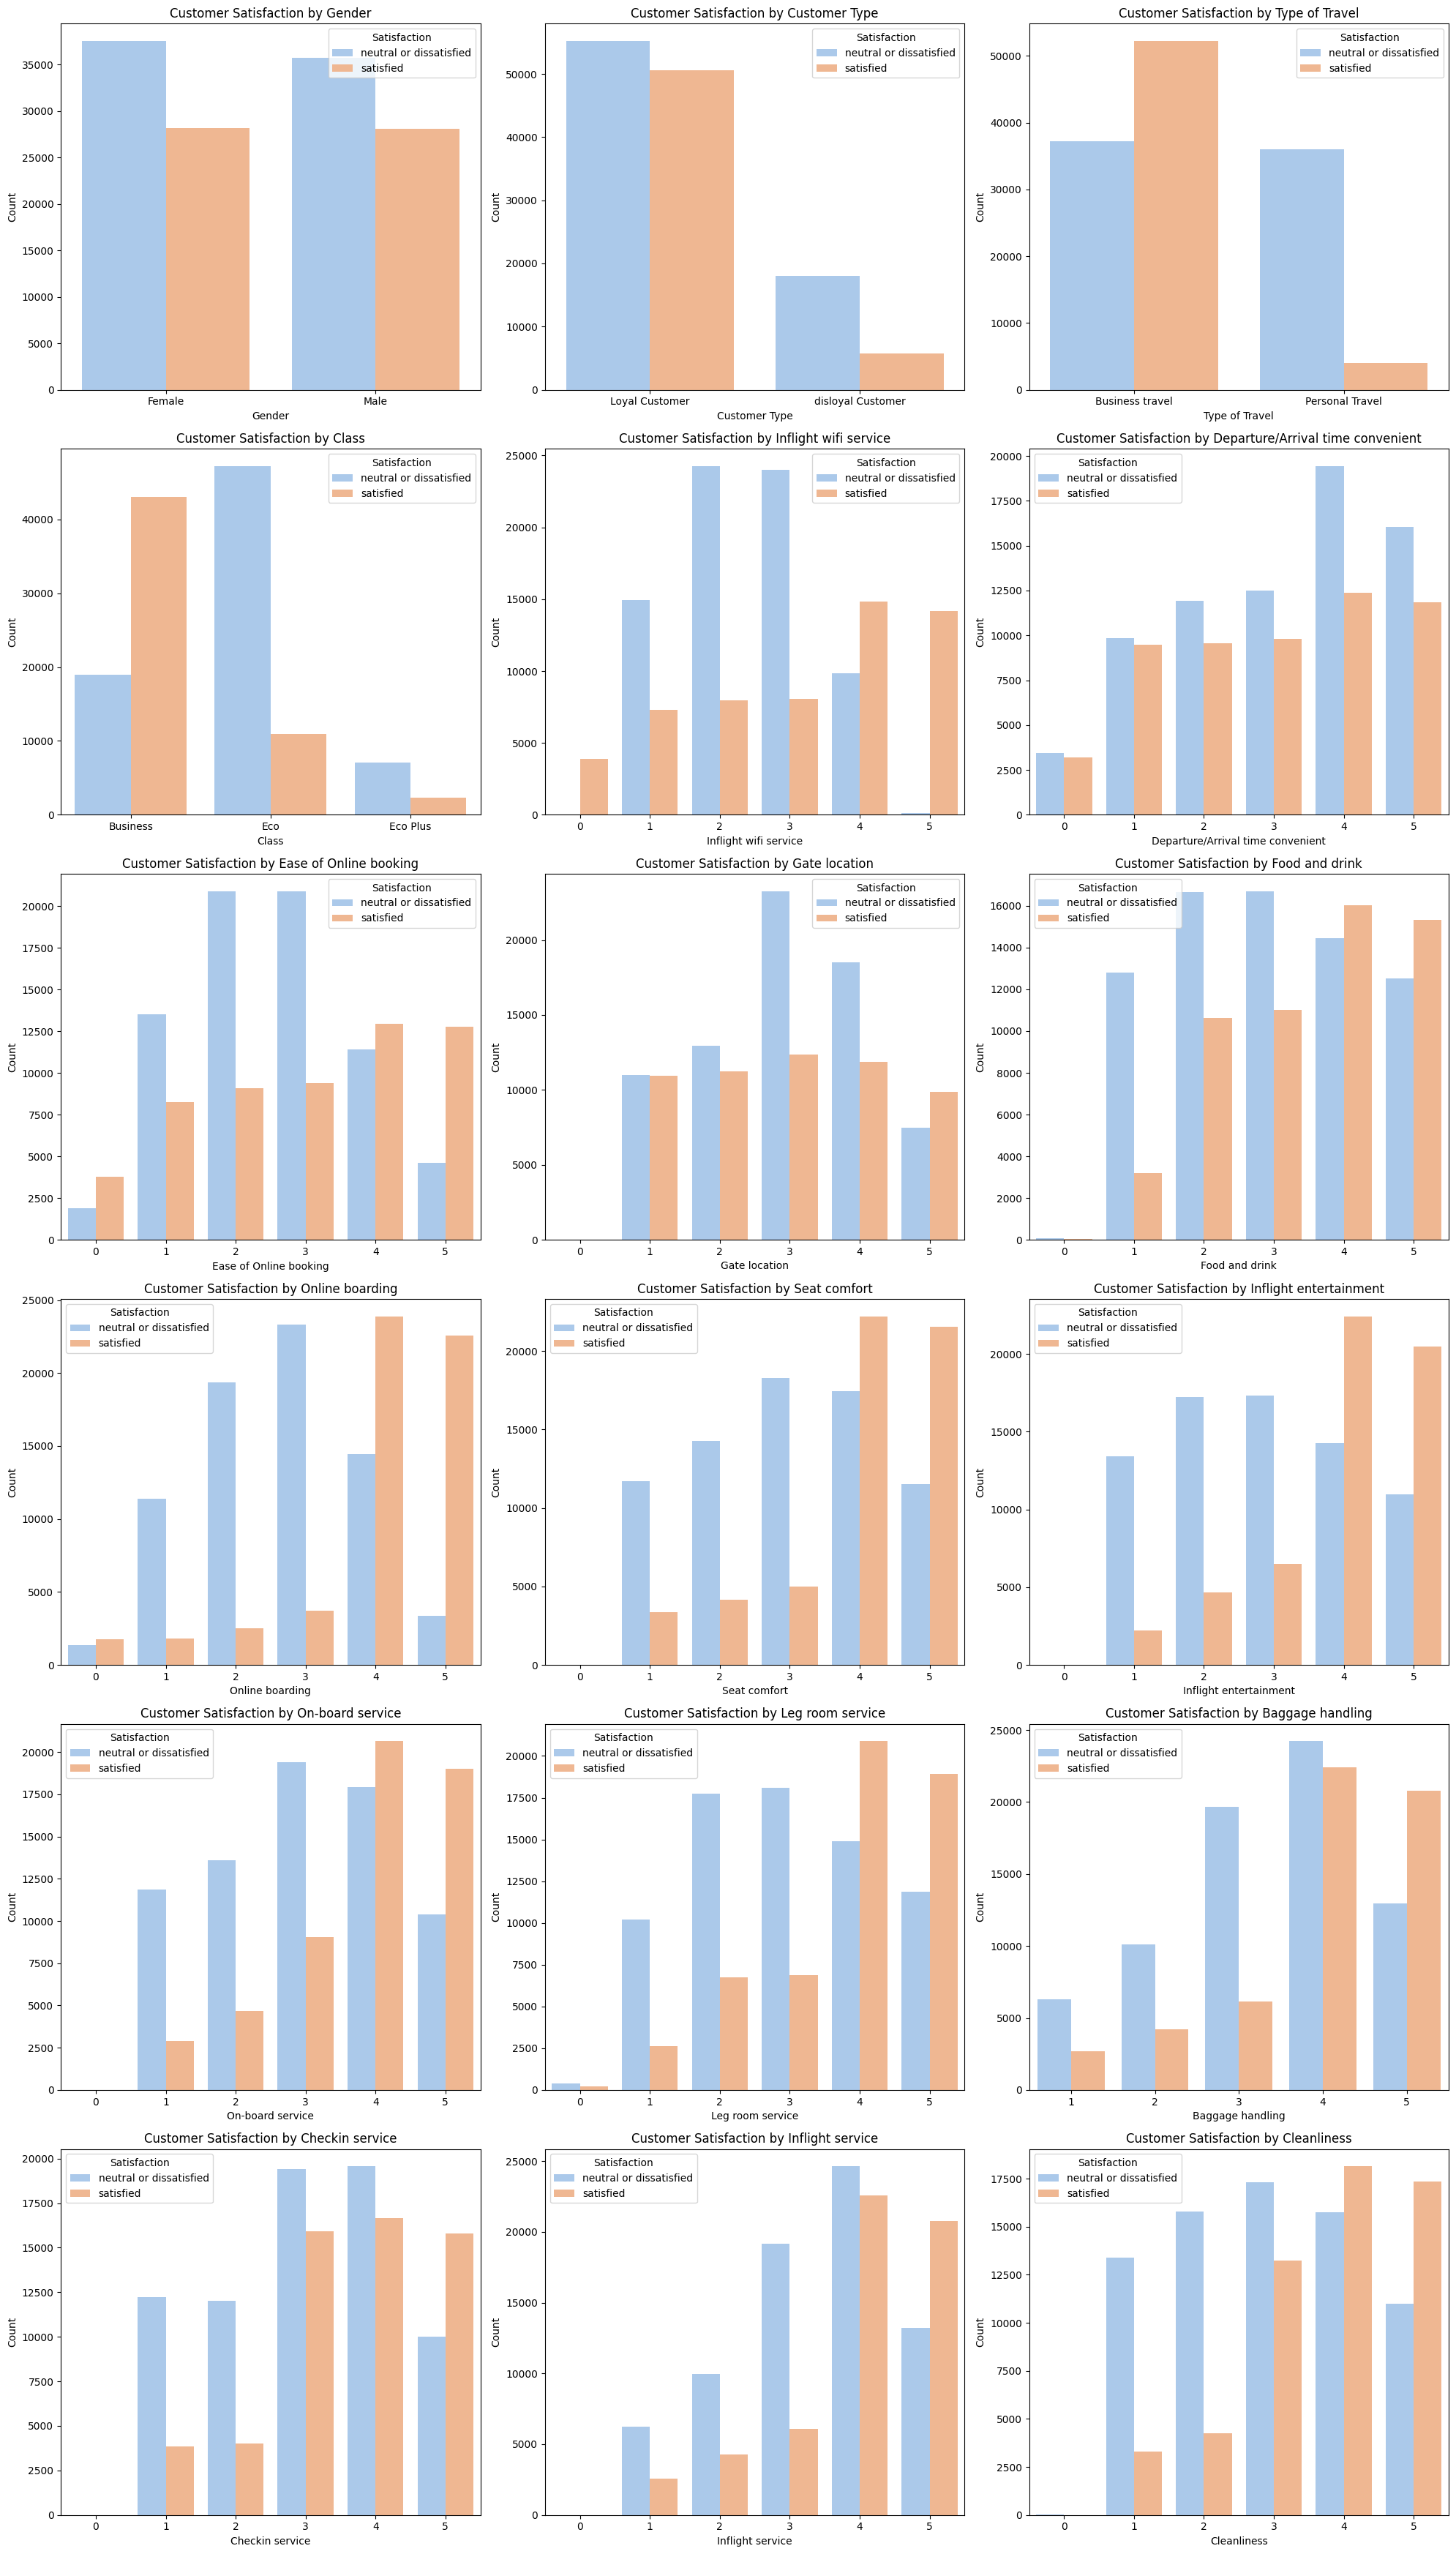

In [137]:
columns_of_interest = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                       'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                       'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                       'Inflight service', 'Cleanliness']

plt.figure(figsize=(20, 35))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=combined_df, x=column, hue='satisfaction', palette='pastel')
    plt.title(f'Customer Satisfaction by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

**Average Ratings of Services**

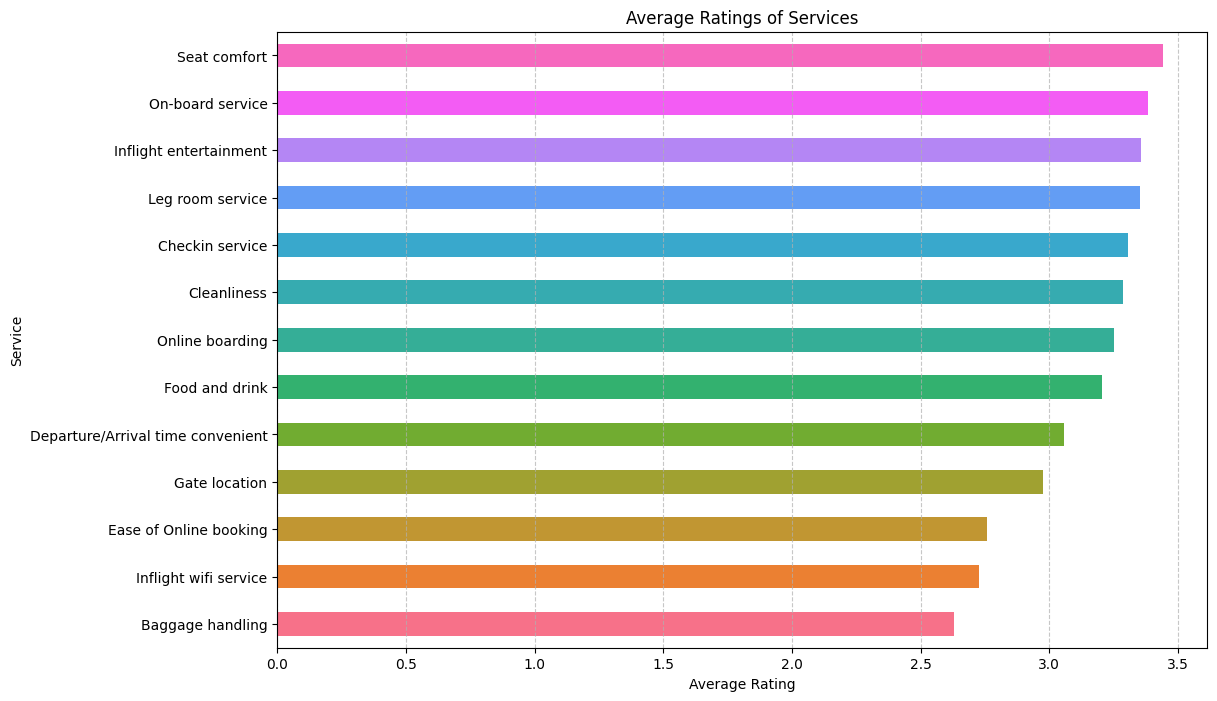

In [138]:
services_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

for col in services_columns:
    if combined_df[col].dtype.name == 'category':
        combined_df[col] = combined_df[col].cat.codes

average_ratings = combined_df[services_columns].mean()

average_ratings_reversed = average_ratings.sort_values(ascending=True)

colors = sns.color_palette("husl", len(average_ratings_reversed))

plt.figure(figsize=(12, 8))
average_ratings_reversed.plot(kind='barh', color=colors)
plt.title('Average Ratings of Services')
plt.xlabel('Average Rating')
plt.ylabel('Service')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Regression

**Linear Regression Analysis to Predict Customer Satisfaction Based on the Inflight Service Rating**

In [139]:
X = combined_df[['Inflight service']]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(combined_df['satisfaction'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Predicted Values:")
print(y_pred)

X_train = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

print("\nOLS Regression Results:")
print(ols_results.summary())

Mean Squared Error: 0.23148180128926338
Predicted Values:
[0.46943585 0.57222641 0.46943585 ... 0.46943585 0.57222641 0.46943585]

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6568.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:13:17   Log-Likelihood:                -71052.
No. Observations:              103589   AIC:                         1.421e+05
Df Residuals:                  103587   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      

- Mean Squared Error(MSE): The average squared difference between predicted and actual satisfaction ratings.
- Predicted Values: The model's predicted satisfaction ratings for the testing data.
- R-squared: Indicates the proportion of variance in the target variable explained by the predictor variable. Here, it's low at 0.060, suggesting the model explains only a small portion of the variance in satisfaction.
- Coefficient (Inflight service): Represents the change in the target variable (satisfaction) for a one-unit change in the predictor variable (Inflight service). In this case, a one-unit increase in Inflight service is associated with a 0.1036 increase in satisfaction, holding other variables constant.
- p-value: Indicates the statistical significance of the predictor variable. A p-value less than 0.05 suggests the predictor is statistically significant, which is the case here for 'Inflight service'.
   

# Dimensionality Reduction

In [140]:
print(X.shape)

(129487, 1)


Explained Variance Ratio: [1.]
             PC1             satisfaction
0      -1.357627                satisfied
1      -0.357627                satisfied
2       1.642373  neutral or dissatisfied
3       2.642373                satisfied
4       1.642373                satisfied
...          ...                      ...
129482  0.642373  neutral or dissatisfied
129483 -1.357627                satisfied
129484 -1.357627  neutral or dissatisfied
129485 -0.357627  neutral or dissatisfied
129486  0.642373  neutral or dissatisfied

[129487 rows x 2 columns]


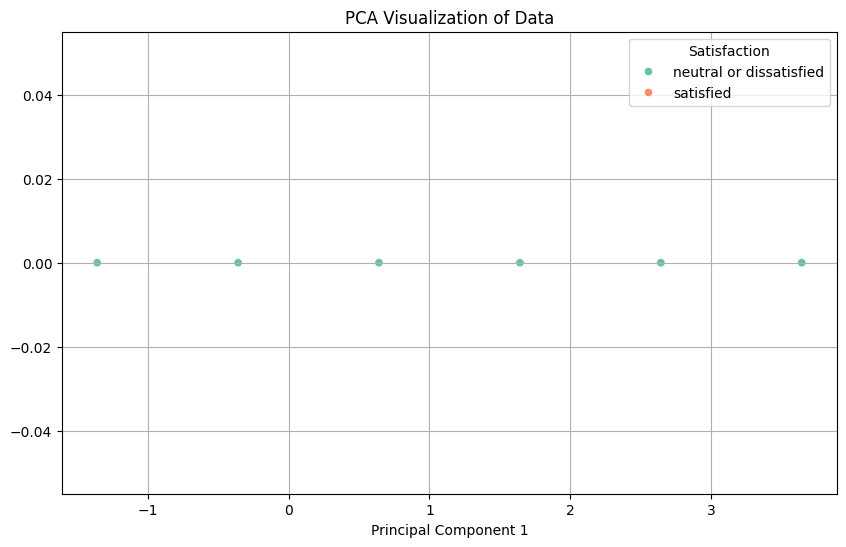

In [141]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1'])

combined_df_reset_index = combined_df.reset_index(drop=True)
pca_df['satisfaction'] = combined_df_reset_index['satisfaction']
print(pca_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y=np.zeros_like(pca_df['PC1']), hue='satisfaction', palette='Set2')
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.legend(title='Satisfaction')
plt.grid(True)
plt.show()

- The fluctuations are small and the values are mostly centered around zero, it suggests that the majority of the variability in the data is indeed captured by 'PC1', but there are still some residual variations present.
- This graph indicates that 'PC1' may not be strongly correlated with the 'satisfaction' variable, or that other factors are influencing the distribution of satisfaction levels in the dataset.


# Correlation with Target Variable

Pearson Correlation with Satisfaction:
Age                                  0.134001
Flight Distance                      0.298206
Inflight wifi service                0.283291
Departure/Arrival time convenient   -0.054457
Ease of Online booking               0.168704
Gate location                       -0.002923
Food and drink                       0.211164
Online boarding                      0.501620
Seat comfort                         0.348576
Inflight entertainment               0.398334
On-board service                     0.322329
Leg room service                     0.312557
Baggage handling                     0.248651
Checkin service                      0.237146
Cleanliness                          0.306891
Departure Delay in Minutes          -0.051032
Arrival Delay in Minutes            -0.058275
Gender_encoded                       0.011496
Customer Type_encoded               -0.185925
Type of Travel_encoded              -0.449794
Class_encoded                       -0.44

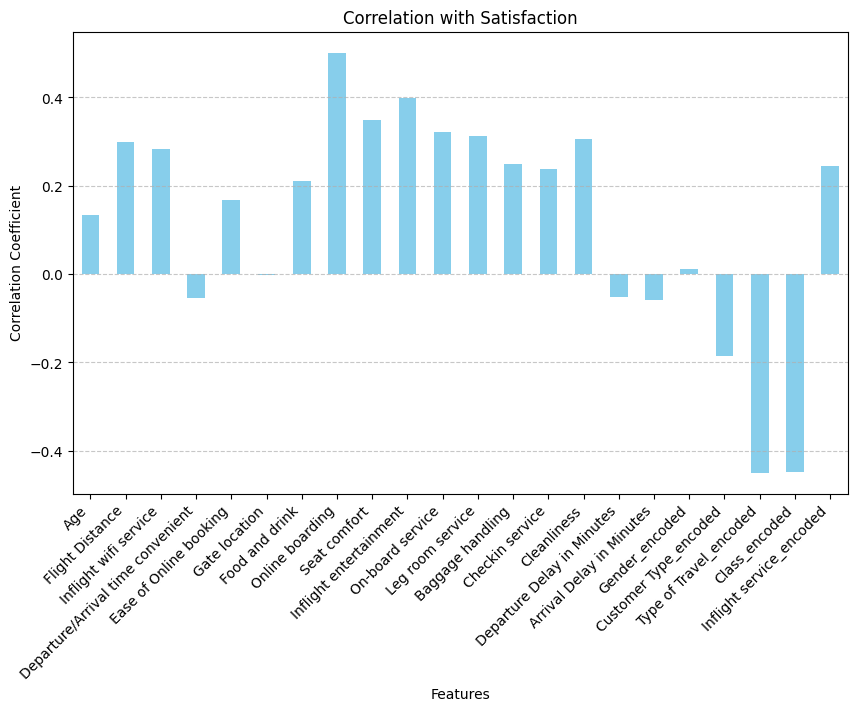

In [142]:
label_encoder = LabelEncoder()

categorical_columns = combined_df.select_dtypes(include=['category']).columns
for col in categorical_columns:
    combined_df[col + '_encoded'] = label_encoder.fit_transform(combined_df[col])

combined_df.drop(columns=categorical_columns, inplace=True)

correlation_with_satisfaction = combined_df.corr()['satisfaction_encoded'].drop('satisfaction_encoded')

print("Pearson Correlation with Satisfaction:")
print(correlation_with_satisfaction)

plt.figure(figsize=(10, 6))
correlation_with_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Correlation with Satisfaction')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pearson correlation coefficient measures strength and direction of linear relationship which ranges from -1 to 1.

# Conclusion

- Majority of passengers are neutral or dissatisfied.
- Business class passengers tend to be more satisfied compared to other classes.
- According to services, seat comfort on top to satisfy the passengers.
- Number of loyal customers are more than the disloyal one.